# Algorithmic Trading Demo
This notebook demonstrates a simple algorithmic trading strategy using historical stock price data. We'll use moving averages to generate buy/sell signals.

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Download Historical Stock Data
We'll use Yahoo Finance to get historical data for a popular stock (e.g., Apple).

In [13]:
# Download data for Apple (AAPL)
data = yf.download('AAPL', start='2023-01-01', end='2024-01-01')
data.head()

/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_88098/4260522012.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2023-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470619,129.226060,122.582127,128.613993,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421249,126.136083,123.164580,125.504267,80962700
2023-01-06,127.962410,128.623840,123.292902,124.398582,87754700
2023-01-09,128.485626,131.703947,128.228957,128.801541,70790800


## Calculate Moving Averages
We'll use short-term and long-term moving averages to generate trading signals.

In [14]:
# Calculate moving averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

## Generate Buy/Sell Signals
Buy when the short-term average crosses above the long-term average, sell when it crosses below.

In [15]:
# Generate signals
data['Signal'] = 0
data['Signal'] = np.where(data['SMA_20'] > data['SMA_50'], 1, -1)
data['Position'] = data['Signal'].diff()

## Visualize Trading Signals
Let's plot the closing price, moving averages, and buy/sell signals.

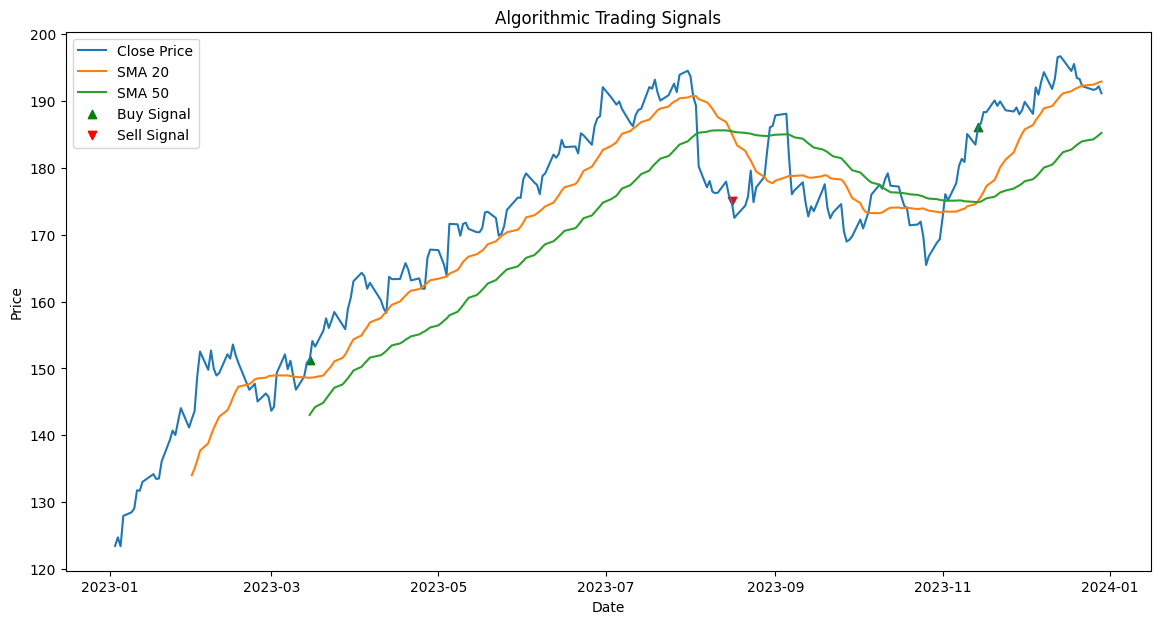

In [16]:
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['SMA_50'], label='SMA 50')
plt.scatter(data.index[data['Position'] == 2], data['Close'][data['Position'] == 2], label='Buy Signal', marker='^', color='g')
plt.scatter(data.index[data['Position'] == -2], data['Close'][data['Position'] == -2], label='Sell Signal', marker='v', color='r')
plt.title('Algorithmic Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Strategy Performance
Let's calculate the returns from this simple strategy.

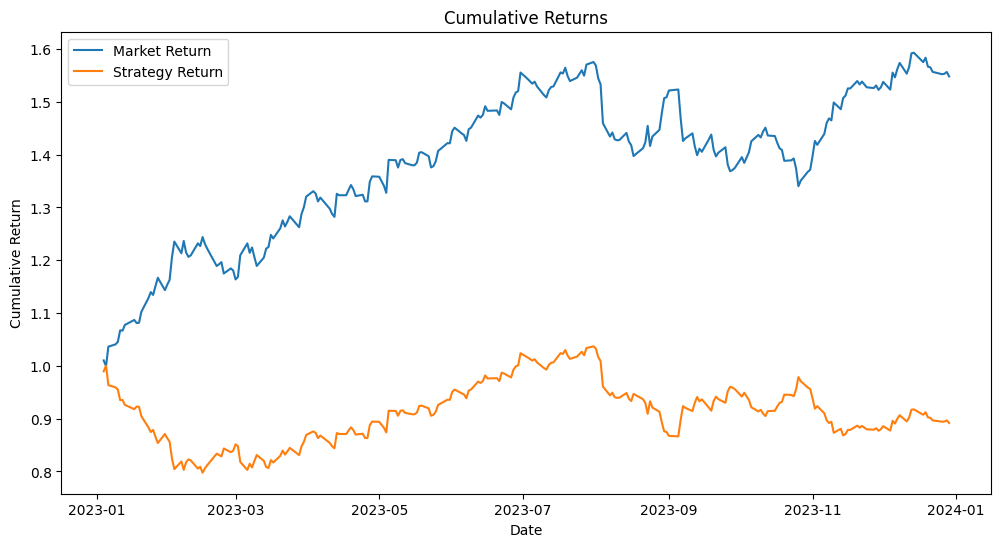

In [17]:
# Calculate daily returns
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Signal'].shift(1)
cumulative_market_return = (1 + data['Market Return']).cumprod()
cumulative_strategy_return = (1 + data['Strategy Return']).cumprod()
plt.figure(figsize=(12,6))
plt.plot(cumulative_market_return, label='Market Return')
plt.plot(cumulative_strategy_return, label='Strategy Return')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()